<a href="https://colab.research.google.com/github/SANGJI-PARK/Codestates_Project/blob/main/%5BSection1_Project%5DGames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1 Project - AI 02기 박상지
--- 


**목차**
1. 지역 별 선호 게임 장르
2. 연도별 게임 트레드
3. 출고량이 높은 게임에 대한 분석 및 시각화 
4. 결론

In [ ]:
#@title
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
#@title
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
#@title
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [4]:
#@title
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv').drop(['Unnamed: 0'],axis=1)
df.shape

(16598, 9)

In [5]:
#@title
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
# 결측치 행 제거
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.isnull().sum())

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64


In [7]:
df['Year']=df['Year'].astype(int)
df['Year']

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16236    2006
16237    2005
16238    2015
16239    2013
16240    1996
Name: Year, Length: 16241, dtype: int64

In [8]:
# Year 데이터 정제

for i in range(df.shape[0]):
  if df.loc[i,'Year'] <= 21 :
    df.loc[i,'Year'] += 2000
  elif df.loc[i,'Year']< 99  :
    df.loc[i,'Year'] += 1900

df.loc[:,'Year']


0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16236    2006
16237    2005
16238    2015
16239    2013
16240    1996
Name: Year, Length: 16241, dtype: int64

In [9]:
# 판매량 변수들 - 점 제거
for i in range(df.shape[0]):
  for j in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:
    df.loc[i,j] = df.loc[i,j].replace('.','')
    
df.loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].head(15)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,004,0,0,0
1,017,0,0,001
2,0,0,002,0
3,004,0,0,0
4,012,009,0,004
5,0,0,014,0
6,002,001,0,0
7,007,0,011,001
8,0,0,004,0
9,004,003,0,001


In [10]:
# 판매량 변수들 - 단위 변환
for i in range(df.shape[0]):
  for j in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:
    if df.loc[i,j][-1] == 'K' :
      df.loc[i,j] = df.loc[i,j].replace('K','')
      df.loc[i,j] += '000'

    elif df.loc[i,j][-1] == 'M' :
      df.loc[i,j]  = df.loc[i,j].replace('M','')
      df.loc[i,j] += '000000'

    else :
      df.loc[i,j] += '000000'

df.loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].head(15)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,004000000,0000000,0000000,0000000
1,017000000,0000000,0000000,001000000
2,0000000,0000000,002000000,0000000
3,004000000,0000000,0000000,0000000
4,012000000,009000000,0000000,004000000
5,0000000,0000000,014000000,0000000
6,002000000,001000000,0000000,0000000
7,007000000,0000000,011000000,001000000
8,0000000,0000000,004000000,0000000
9,004000000,003000000,0000000,001000000


In [11]:
# 판매량 변수들 - 형변환(string -> int)
for i in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:
  df[i] = df[i].astype(int)

df.dtypes

Name           object
Platform       object
Year            int64
Genre          object
Publisher      object
NA_Sales        int64
EU_Sales        int64
JP_Sales        int64
Other_Sales     int64
dtype: object

# 1. 지역별 선호 장르

In [12]:
#@title
grouped_Genre = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby(df['Genre']).sum().reset_index()
grouped_Genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,76377030000,46653220000,14653170000,16841910000
1,Adventure,9459270000,5821140000,4965060000,1527080000
2,Fighting,20361810000,8943390000,7634180000,3358140000
3,Misc,36283760000,18002140000,9369230000,6765130000
4,Platform,41222310000,18396290000,10449210000,4472340000
5,Puzzle,9325070000,4790050000,4706000000,1199000000
6,Racing,32793490000,21576630000,5300260000,7239340000
7,Role-Playing,29515210000,16641030000,30862830000,5150730000
8,Shooter,52946650000,27848340000,3328040000,9639340000
9,Simulation,16409870000,9381100000,5933250000,2918070000


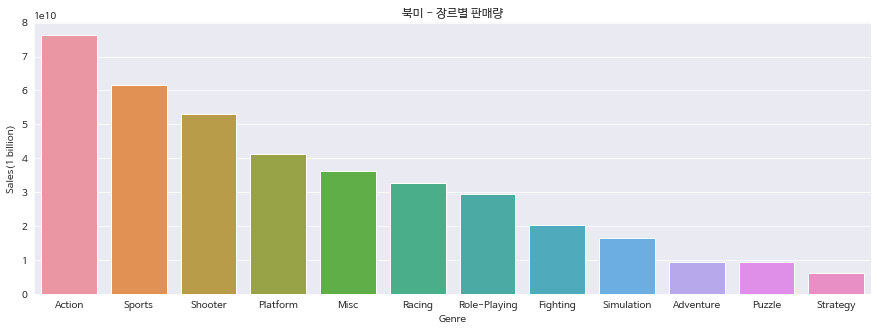

In [37]:
#@title
# NA game sales by genre

plt.figure(figsize=(15,5))
genre_NA = grouped_Genre.loc[:,['Genre','NA_Sales']].sort_values(by='NA_Sales',ascending=False)
g1 = sns.barplot(data=genre_NA,x='Genre',y='NA_Sales')
g1.set_title('북미 - 장르별 판매량')
g1.set_ylabel('Sales(1 billion)')
plt.show()

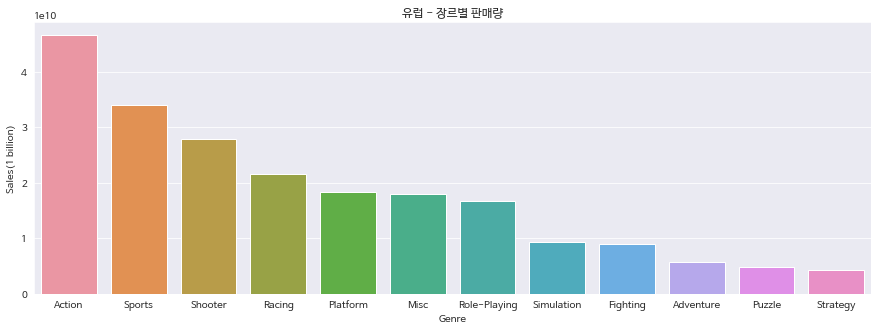

In [38]:
#@title
# EU game sales by genre
plt.figure(figsize=(15,5))
genre_EU = grouped_Genre.loc[:,['Genre','EU_Sales']].sort_values(by='EU_Sales',ascending=False)
g2 = sns.barplot(data=genre_EU,x='Genre',y='EU_Sales')
g2.set_title('유럽 - 장르별 판매량')
g2.set_ylabel('Sales(1 billion)')
plt.show()


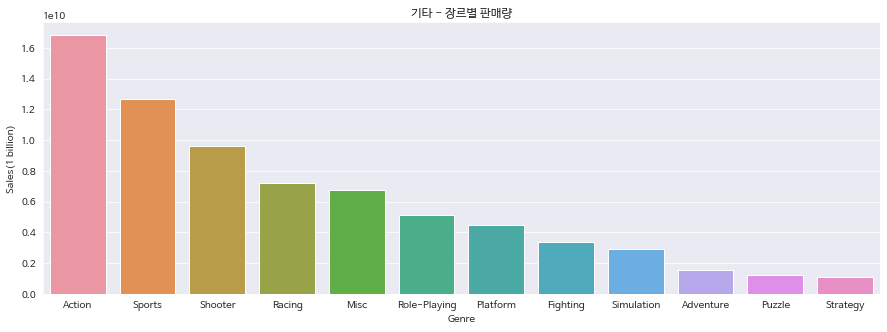

In [39]:
#@title
# Other game sales by genre
plt.figure(figsize=(15,5))
genre_Other = grouped_Genre.loc[:,['Genre','Other_Sales']].sort_values(by='Other_Sales',ascending=False)
g4 = sns.barplot(data=genre_Other,x='Genre',y='Other_Sales')
g4.set_title('기타 - 장르별 판매량')
g4.set_ylabel('Sales(1 billion)')
plt.show()

> 북미, 유럽, 기타 지역
* 가장 많이 판매된 장르 3개 : Action, Sports, Shooter
* 그 외의 전체적으로도 유사한 선호도를 보이고 있음

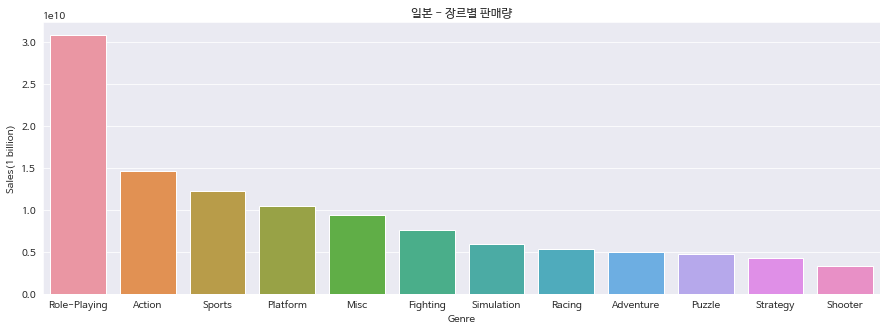

In [40]:
#@title
# JP game sales by genre
plt.figure(figsize=(15,5))
genre_JP = grouped_Genre.loc[:,['Genre','JP_Sales']].sort_values(by='JP_Sales',ascending=False)
g3 = sns.barplot(data=genre_JP,x='Genre',y='JP_Sales')
g3.set_title('일본 - 장르별 판매량')
g3.set_ylabel('Sales(1 billion)')
plt.show()

> 일본
- **Role-Playing** 장르가 타 지역에 비해 압도적인 판매량을 보이고 있음
- 모든 타 지역에서 3번째로 선호도가 높았던 **Shooter** 장르가 일본에서는 최하위의 선호도를 보이고 있음.

# 2. 연도별 게임의 트렌드

In [17]:
#@title
df['Total'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4000000,0,0,0,4000000
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17000000,0,0,1000000,18000000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,2000000,0,2000000
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4000000,0,0,0,4000000
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12000000,9000000,0,4000000,25000000


In [18]:
#@title
df2 = df.loc[:,['Year','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total']]
year_genre = df2.groupby(by=['Year','Genre']).sum().reset_index()
year_genre


,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,1980,Action,32000000,2000000,0,0,34000000
1,1980,Fighting,72000000,4000000,0,1000000,77000000
2,1980,Misc,253000000,15000000,0,2000000,270000000
3,1980,Shooter,260000000,43000000,0,8000000,311000000
4,1981,Action,1323000000,70110000,0,12000000,1405110000
...,...,...,...,...,...,...,...
383,2016,Sports,457000000,736000000,78000000,183000000,1454000000
384,2016,Strategy,11000000,14000000,5000000,4000000,34000000
385,2017,Action,0,0,1000000,0,1000000
386,2017,Role-Playing,0,0,4000000,0,4000000


##### 연도별 게임 트렌드 - 전지역

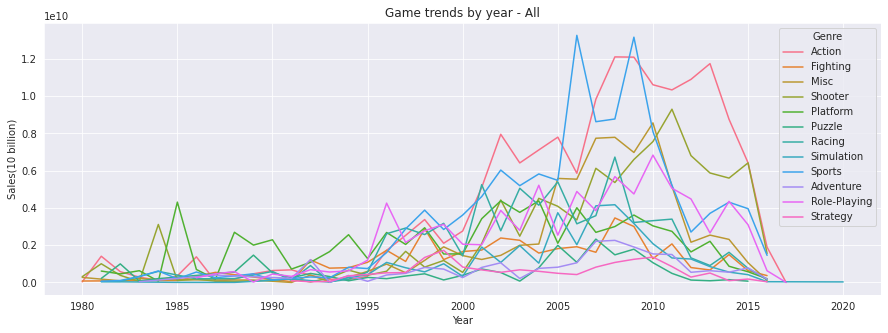

In [46]:
#@title
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

y_g = sns.lineplot(data=year_genre,x='Year',y='Total',hue='Genre')
y_g.set_title('Game trends by year - All')
y_g.set_ylabel('Sales(10 billion)')

plt.show()

> 연도별 게임 트렌드 - 모든 지역
* 1900년대 후반 : Shooter, Platform2
* 2000년대 Action, Sports
* 특히 Action은 현재 가장 많이 팔리는 장르고 스포츠 장르는 200년대 중후반에 반짝 1위를 했다가 현재는 점점 판매량이 감소하고 있는 추세.

##### 연도별 게임 트렌드 - 북미

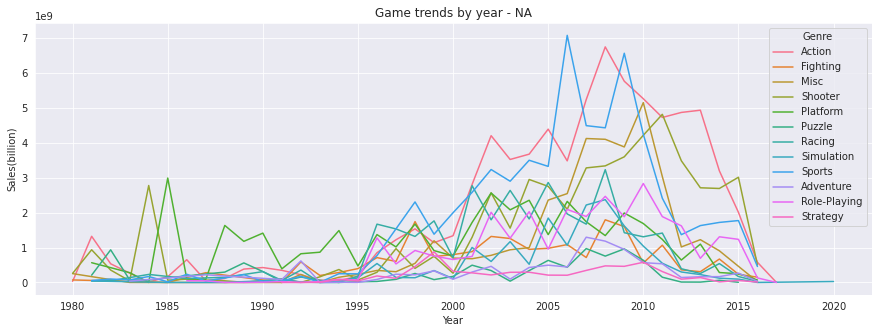

In [20]:
#@title
# Game trends by year - NA
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

y_g = sns.lineplot(data=year_genre,x='Year',y='NA_Sales',hue='Genre')
y_g.set_title('Game trends by year - NA')
y_g.set_ylabel('Sales(billion)')

plt.show()
#지역별로 좀 더 자세히 살펴보겠습니다. 먼저 북미지역입니다. 
#북미지역은 전체 판매량 추이와 비슷한 경향을 보이고 있습니다.
#다만, 2015년도에 들어서면서부터 슈팅 장르의 게임이 1위를 차지하기 시작하였습니다.

연도별 게임 트렌드 - 북미
* 1985년도 이전 :Shooter 
* 1985년~1990년도 후반 : Platform
* 1990년도 후반, 2000년도 중후반 : Sports
* 2000년도~2010년도중반 : Action
* 2010년도 중반~현재 : Shooter

In [21]:
#@title
NA_85 = df[['Year','Genre','Name','NA_Sales']]
NA_85 = NA_85.groupby(['Year','Genre','Name']).sum().sort_values(by='Year').reset_index()
NA_85 = NA_85[NA_85['Year']<=2000].sort_values(by='NA_Sales',ascending=False).reset_index().drop('index',axis=1)
NA_85.head(5)

,Year,Genre,Name,NA_Sales
0,1985,Platform,Super Mario Bros.,2908000000
1,1984,Shooter,Duck Hunt,2693000000
2,1990,Platform,Super Mario World,1278000000
3,1996,Role-Playing,Pokemon Red/Pokemon Blue,1127000000
4,1989,Platform,Super Mario Land,1083000000


In [48]:
#@title
NA_SP = df[['Year','Genre','Name','NA_Sales']][df['Genre']=='Sports']
NA_SP = NA_SP.groupby(['Year','Genre','Name']).sum().sort_values(by='Year').reset_index()
NA_SP_0510 = NA_SP[NA_SP['Year']<=2010].sort_values(by='NA_Sales',ascending=False).reset_index().drop('index',axis=1)
NA_SP_0510.head(5)
#2000년대 중후반에 북미 가장많이 팔린 Sports 게임 : Will Sports
#상위 4위의 게임이 모두 Will Sports시리즈 인것임을 알 수 있습니다.

,Year,Genre,Name,NA_Sales
0,2006,Sports,Wii Sports,4149000000
1,2009,Sports,Wii Sports Resort,1575000000
2,2009,Sports,Wii Fit Plus,909000000
3,2007,Sports,Wii Fit,894000000
4,2006,Sports,Madden NFL 07,771000000


In [23]:
#@title
# 2000년대 중후반에 북미에서 가장많이 팔린 게임 장르 : Action
NA_AC = df[['Year','Genre','Name','NA_Sales']][df['Genre']=='Action']
NA_AC = NA_AC.groupby(['Year','Genre','Name']).sum().sort_values(by='Year').reset_index()
NA_AC_0510 = NA_AC[NA_AC['Year']<=2010].sort_values(by='NA_Sales',ascending=False).reset_index().drop('index',axis=1)
NA_AC_0510.head(5)
#2000년대 중후반에 북미지역에서 가장 많이 Action장르의 게임은 [Grand Theft Auto IV]입니다. - 일명GTA

,Year,Genre,Name,NA_Sales
0,2008,Action,Grand Theft Auto IV,1152000000
1,2004,Action,Grand Theft Auto: San Andreas,943000000
2,2007,Action,LEGO Star Wars: The Complete Saga,910000000
3,2002,Action,Grand Theft Auto: Vice City,841000000
4,2001,Action,Grand Theft Auto III,699000000


In [24]:
#@title
# Shooter
NA_SH = df[['Year','Genre','Name','NA_Sales']][df['Genre']=='Shooter']
NA_SH = NA_SH.groupby(['Year','Genre','Name']).sum().sort_values(by='Year').reset_index()
NA_SH_2015 = NA_SH[NA_SH['Year']>=2015].sort_values(by='NA_Sales',ascending=False).reset_index().drop('index',axis=1)
NA_SH_2015.head(5)
#2000년대 중반에 북미지역에서 가장 많이 Shooter장르의 게임은 [Call of Duty: Black Ops 3]입니다. 
#2위 게임과 2배 가량 차이가 많이 남

,Year,Genre,Name,NA_Sales
0,2015,Shooter,Call of Duty: Black Ops 3,1189000000
1,2015,Shooter,Star Wars Battlefront (2015),500000000
2,2015,Shooter,Halo 5: Guardians,264000000
3,2015,Shooter,Gears of War: Ultimate Edition,238000000
4,2015,Shooter,Destiny: The Taken King,197000000


##### 연도별 게임 트렌드 - 유럽

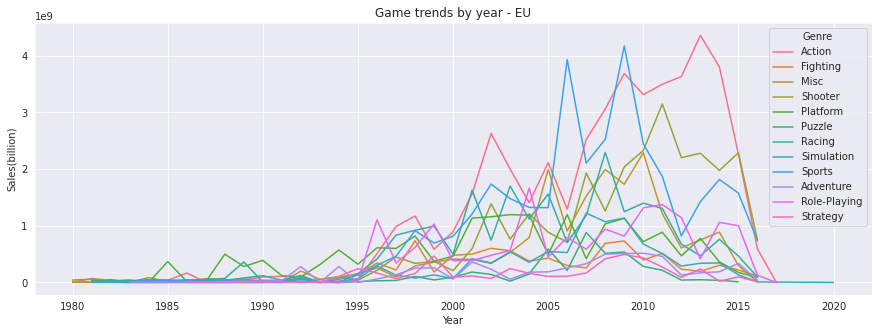

In [25]:
#@title
# Game trends by year - EU
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

y_g = sns.lineplot(data=year_genre,x='Year',y='EU_Sales',hue='Genre')
y_g.set_title('Game trends by year - EU')
y_g.set_ylabel('Sales(billion)')

plt.show()

> 연도별 게임 트렌드- 유럽
* Action장르의 판매량이 2010년도 중반까지 크게 증가한 것만 제외하고는 전반적으로 북미 지역과 유사함

In [26]:
#@title
# 2000년대 중후반에 유럽에서 가장많이 팔린 게임 장르 : Sports
EU_SP = df[['Year','Genre','Name','EU_Sales']][df['Genre']=='Sports']
EU_SP = EU_SP.groupby(['Year','Genre','Name']).sum().sort_values(by='Year').reset_index()
EU_SP_0510 = EU_SP[EU_SP['Year']<=2010].sort_values(by='EU_Sales',ascending=False).reset_index().drop('index',axis=1)
EU_SP_0510.head()
#2000년대 중후반에 유럽 지역에서 가장 많이 팔린 Sports장르의 게임은 [Wii Sports]입니다.
#북미 지역과 유사하게 Wii Sports 시리즈의 인기가 좋았습니다.

,Year,Genre,Name,EU_Sales
0,2006,Sports,Wii Sports,2902000000
1,2009,Sports,Wii Sports Resort,1101000000
2,2009,Sports,Wii Fit Plus,859000000
3,2007,Sports,Wii Fit,803000000
4,2009,Sports,FIFA Soccer 10,623000000


In [50]:
#@title
# 2010년대 이후 유럽에서 가장많이 팔린 게임 장르 : Action
EU_AC = df[['Year','Genre','Name','EU_Sales']][df['Genre']=='Action']
EU_AC = EU_AC.groupby(['Year','Genre','Name']).sum().sort_values(by='Year').reset_index()
EU_AC_2000 = EU_AC[EU_AC['Year']>=2010].sort_values(by='EU_Sales',ascending=False).reset_index().drop('index',axis=1)
EU_AC_2000.head(5)
# 2000년대 중후반에 유럽 지역에서 가장 많이 팔린 Action장르의 게임은 [Grand Theft Auto V]입니다.
# GTA가 상위를 차지하고 있지만 장르가 잘못입력된 피파를 제거하고 보더라도 북미에 비해선 다양한 시리즈가 골고루 팔리지 않음

,Year,Genre,Name,EU_Sales
0,2013,Action,Grand Theft Auto V,1458000000
1,2012,Action,FIFA Soccer 13,980000000
2,2014,Action,Grand Theft Auto V,782000000
3,2013,Action,Assassin's Creed IV: Black Flag,518000000
4,2010,Action,Red Dead Redemption,458000000


##### 연도별 게임 트렌드 - 일본

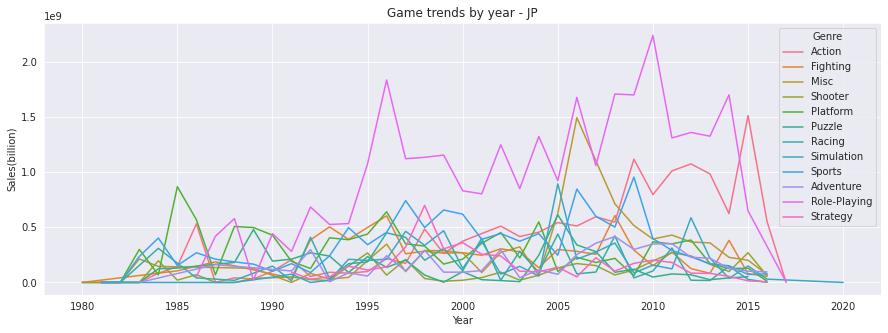

In [52]:
#@title
# Game trends by year - JP
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

y_g = sns.lineplot(data=year_genre,x='Year',y='JP_Sales',hue='Genre')
y_g.set_title('Game trends by year - JP')
y_g.set_ylabel('Sales(billion)')

plt.show()

[일본 지역 연도별 게임 트렌드]
* 꾸준히  Role-Playing 장르가 많이 판매됨.
* 다만, 2010년대 중반에 들어서면서 Action이 Role-Playing을 추월함.

In [29]:
#@title
#일본에서 롤플레잉이 가장 많이 팔린 2010년에 어떤 게임이 팔렸나?
JP_RP = df[['Year','Genre','Name','JP_Sales']][df['Genre']=='Role-Playing']
JP_RP = JP_RP.groupby(['Year','Genre','Name']).sum().sort_values(by='Year').reset_index()
JP_RP_2010 = JP_RP[JP_RP['Year']>= 2010].sort_values(by='JP_Sales',ascending=False).reset_index().drop('index',axis=1)
JP_RP_2010.head(5)
# 2010년, 일본에서 가장 많이 팔린 Role-Playing 게임은 [Pokemon Black/Pokemon White]입니다.

,Year,Genre,Name,JP_Sales
0,2010,Role-Playing,Pokemon Black/Pokemon White,565000000
1,2010,Role-Playing,Monster Hunter Freedom 3,487000000
2,2013,Role-Playing,Monster Hunter 4,344000000
3,2014,Role-Playing,Yokai Watch 2 Ganso/Honke,318000000
4,2012,Role-Playing,Pokemon Black 2/Pokemon White 2,314000000


In [30]:
#@title
#2000년대 이전2000년대 이전
JP_RP = df[['Year','Genre','Name','JP_Sales']][df['Genre']=='Role-Playing']
JP_RP = JP_RP.groupby(['Year','Genre','Name']).sum().sort_values(by='Year').reset_index()
JP_RP_2000 = JP_RP[JP_RP['Year']<= 2000].sort_values(by='JP_Sales',ascending=False).reset_index().drop('index',axis=1)
JP_RP_2000.head(5)
JP_RP = df[['Year','Genre','Name','JP_Sales']][df['Genre']=='Role-Playing']
JP_RP = JP_RP.groupby(['Year','Genre','Name']).sum().sort_values(by='Year').reset_index()
JP_RP_2000 = JP_RP[JP_RP['Year']<= 2000].sort_values(by='JP_Sales',ascending=False).reset_index().drop('index',axis=1)
JP_RP_2000.head(5)

,Year,Genre,Name,JP_Sales
0,1996,Role-Playing,Pokemon Red/Pokemon Blue,1022000000
1,1988,Role-Playing,Dragon Warrior III,377000000
2,1999,Role-Playing,Final Fantasy VIII,363000000
3,1997,Role-Playing,Final Fantasy VII,328000000
4,1995,Role-Playing,Dragon Quest VI: Maboroshi no Daichi,319000000


In [31]:
#@title
#2010년대 중반, 일본에서 Role-Playing을 역전하고 가장많이 팔린 Action장르의 게임들
JP_AC = df[['Year','Genre','Name','JP_Sales']][df['Genre']=='Action']
JP_AC = JP_AC.groupby(['Year','Genre','Name']).sum().sort_values(by='Year').reset_index()
JP_AC_2015 = JP_AC[JP_AC['Year']>= 2015].sort_values(by='JP_Sales',ascending=False).reset_index().drop('index',axis=1)
JP_AC_2015.head(5)
# 2010년대 중반, 일본에서 Role-Playing을 역전하고 가장 많이 팔린 Action 게임은 [Monster Hunter X]입니다.

,Year,Genre,Name,JP_Sales
0,2015,Action,Monster Hunter X,278000000
1,2015,Action,Yokai Watch Busters,228000000
2,2016,Action,Yokai Watch 3,127000000
3,2015,Action,Dragon Quest Heroes: The World's Tree Woe and ...,86000000
4,2015,Action,Monster Strike 3DS,86000000


##### 연도별 게임 트렌드 - 그 외 지역

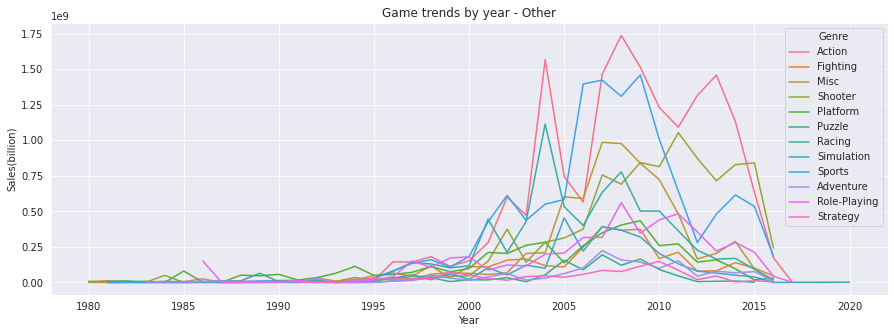

In [32]:
#@title
# Game trends by year - Other
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

y_g = sns.lineplot(data=year_genre,x='Year',y='Other_Sales',hue='Genre')
y_g.set_title('Game trends by year - Other')
y_g.set_ylabel('Sales(billion)')

plt.show()

# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [54]:
#@title
#grouped_Name = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total']].groupby(df['Name']).sum().sort_values(by='Total',ascending=False)
grouped_Name = df.groupby(by=['Name','Genre','Platform','Publisher']).sum().sort_values(by='Total',ascending=False).reset_index()
grouped_Name.head(20) #상위 20개 중 17개가 Nintendo에서 출시한 게임

,Name,Genre,Platform,Publisher,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Wii Sports,Sports,Wii,Nintendo,2006,4149000000,2902000000,377000000,846000000,8274000000
1,Super Mario Bros.,Platform,NES,Nintendo,1985,2908000000,358000000,681000000,77000000,4024000000
2,Mario Kart Wii,Racing,Wii,Nintendo,2008,1585000000,1288000000,379000000,331000000,3583000000
3,Wii Sports Resort,Sports,Wii,Nintendo,2009,1575000000,1101000000,328000000,296000000,3300000000
4,Pokemon Red/Pokemon Blue,Role-Playing,GB,Nintendo,1996,1127000000,889000000,1022000000,1000000,3039000000
5,Duck Hunt,Shooter,NES,Nintendo,1984,2693000000,63000000,28000000,47000000,2831000000
6,New Super Mario Bros. Wii,Platform,Wii,Nintendo,2009,1459000000,706000000,47000000,226000000,2438000000
7,Mario Kart DS,Racing,DS,Nintendo,2005,981000000,757000000,413000000,192000000,2343000000
8,Wii Fit Plus,Sports,Wii,Nintendo,2009,909000000,859000000,253000000,179000000,2200000000
9,Kinect Adventures!,Misc,X360,Microsoft Game Studios,2010,1497000000,494000000,24000000,167000000,2182000000


In [64]:
#@title
group_pb = df[['Publisher','Total']].groupby(by='Publisher').sum().sort_values(by='Total',ascending=False).reset_index()
group_pb_10 = group_pb[:10]
group_pb_10

,Publisher,Total
0,Nintendo,157714820000
1,Electronic Arts,100101490000
2,Activision,65288330000
3,Sony Computer Entertainment,55147720000
4,Ubisoft,42819320000
5,Take-Two Interactive,35595140000
6,THQ,31049440000
7,Konami Digital Entertainment,25210680000
8,Sega,23922730000
9,Microsoft Game Studios,23336360000


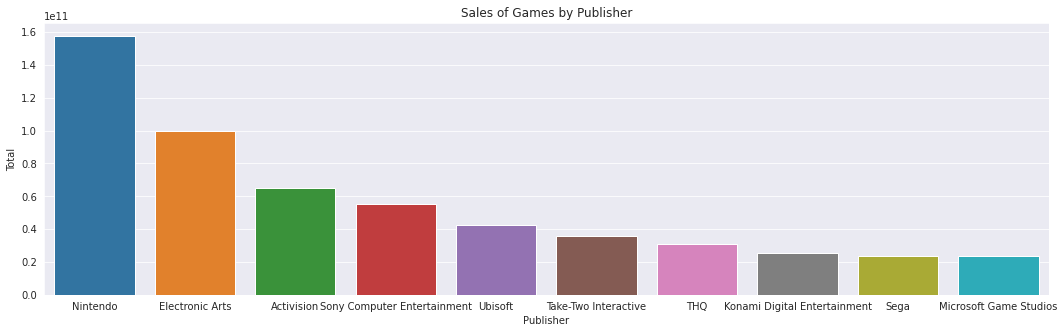

In [71]:
#@title
plt.figure(figsize=(18,5))
sns.set_style('darkgrid')

sns.barplot(data=group_pb_10,x='Publisher',y='Total').set_title('Sales of Games by Publisher')

plt.show()

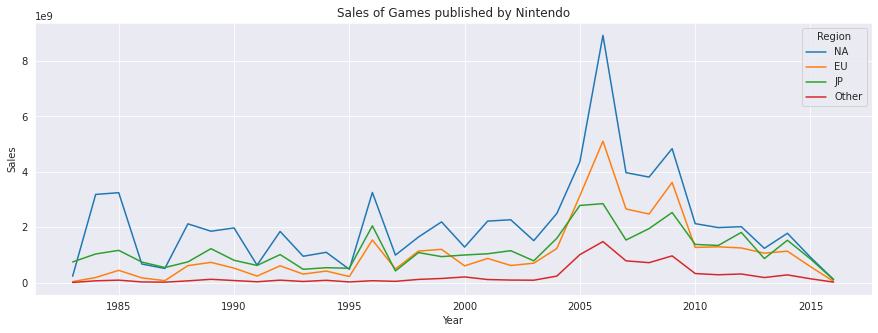

In [34]:
#@title
# Games published by Nintendo
nintendo = df[df['Publisher']=='Nintendo']
nintendo_year = nintendo.groupby(by='Year').sum().reset_index()
nintendo_year = nintendo_year.rename(columns={'NA_Sales':'NA','EU_Sales':'EU','JP_Sales':'JP','Other_Sales':'Other'})
nintendo_melt = nintendo_year.melt(id_vars=['Year'],value_vars=['NA','EU','JP','Other'])
nintendo_melt = nintendo_melt.rename(columns={'variable':'Region','value':'Sales'}).sort_values(by='Year').reset_index().drop('index',axis=1)
nintendo_melt.head(10)


plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

ax = sns.lineplot(data=nintendo_melt,x='Year',y='Sales',hue='Region')
ax.set_title('Sales of Games published by Nintendo')
plt.show()

### 요약
> 지역별 선호 장르

  1.  북미,유럽,기타 지역
    *  유사한 패턴을 보이고 있음 -> 상위 3개 장르 : Action, Sports, Shooter
  2. 일본 
    * Role-Playing 장르가 타 지역에 비해 압도적인 판매량을 보이고 있음
    * 타 지역에서 3번째로 선호도가 높았던 Shooter 장르가 일본에서는 최하위의 선호도를 보이고 있음.  

<br>

> 연도별 게임 트렌드

  1. 북미
    * 1985년도 이전 : Shooter
    * 1985년~1990년도 후반 : Platform
    * 1990년도 후반, 2000년도 중후반 : Sports
    * 2000년도~2010년도중반 : Action
    * 2010년도 중반~현재 : Shooter  
  2. 유럽
    * Action장르의 판매량이 2010년도 중반까지 크게 증가한 것만 제외하고는 전반적으로 북미 지역과 유사함
  3. 일본
    * 꾸준히 Role-Playing 장르가 많이 판매됨.
다만, 2010년대 중반에 들어서면서 Action이 Role-Playing을 추월함.

<br>

> 출고량이 높은 게임에 대한 분석

   * 모든 지역을 통틀어 Nintendo에서 출시한 게임들이 장르를 불문하고 선호도가 높음